In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from nltk.metrics.distance import edit_distance
from nltk.tokenize import word_tokenize
import numpy as np

In [26]:
# Example inputs
user_input = "AI Engineer maaş aralığı nedir?"
responses = [
    "AI Engineer pozisyonu için maaş aralığı 15,000 - 25,000 TL arasındadır.",
    "ML Engineer pozisyonu için maaş aralığı 14,000 - 22,000 TL arasındadır.",
    "Data Engineer pozisyonu için maaş aralığı 13,000 - 20,000 TL arasındadır.",
    "DL Engineer pozisyonu için maaş aralığı 16,000 - 26,000 TL arasındadır."
]


In [27]:
def calculate_cosine_similarity(user_input, responses):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([user_input] + responses)
    cosine_similarities = cosine_similarity(vectors[0], vectors[1:])
    return cosine_similarities.flatten()

In [28]:
def calculate_jaccard_similarity(user_input, responses):
    user_set = set(word_tokenize(user_input.lower()))
    similarities = []
    for response in responses:
        response_set = set(word_tokenize(response.lower()))
        intersection = len(user_set.intersection(response_set))
        union = len(user_set.union(response_set))
        similarities.append(intersection / union if union != 0 else 0)
    return similarities


In [29]:
def calculate_euclidean_distance(user_input, responses):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([user_input] + responses).toarray()
    distances = euclidean_distances([vectors[0]], vectors[1:])
    return 1 / (1 + distances.flatten())  # Invert to make it similarity


In [30]:
def calculate_manhattan_distance(user_input, responses):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([user_input] + responses).toarray()
    distances = manhattan_distances([vectors[0]], vectors[1:])
    return 1 / (1 + distances.flatten())  # Invert to make it similarity


In [31]:
def calculate_levenshtein_distance(user_input, responses):
    similarities = []
    for response in responses:
        distance = edit_distance(user_input.lower(), response.lower())
        similarity = 1 / (1 + distance)  # Convert to similarity
        similarities.append(similarity)
    return similarities


In [32]:
print("Cosine Similarity:", calculate_cosine_similarity(user_input, responses))
print("Euclidean Distance:", calculate_euclidean_distance(user_input, responses))
print("Manhattan Distance:", calculate_manhattan_distance(user_input, responses))
print("Levenshtein Distance:", calculate_levenshtein_distance(user_input, responses))

Cosine Similarity: [0.3599928  0.17884475 0.17884475 0.17884475]
Euclidean Distance: [0.46918021 0.43830301 0.43830301 0.43830301]
Manhattan Distance: [0.22641097 0.19591517 0.19591517 0.19591517]
Levenshtein Distance: [0.022727272727272728, 0.021739130434782608, 0.02127659574468085, 0.021739130434782608]


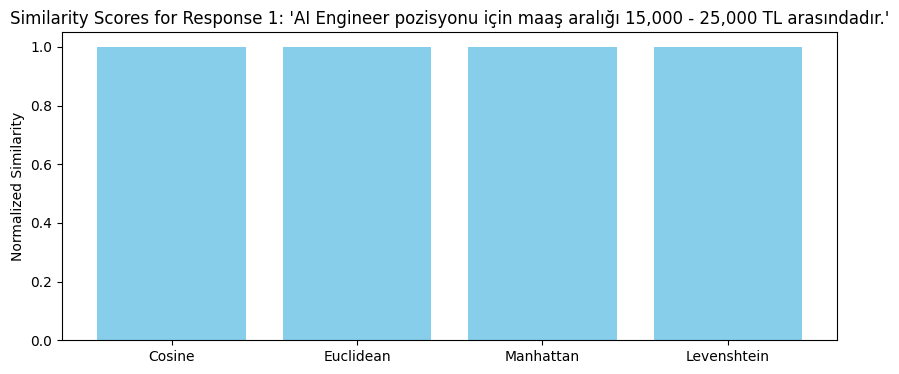

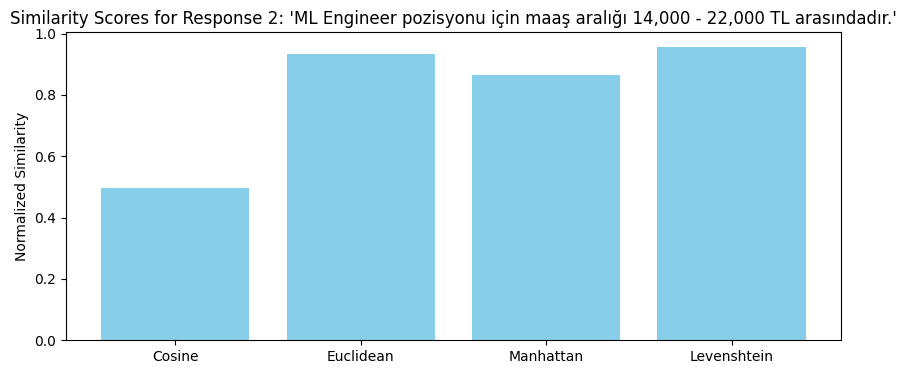

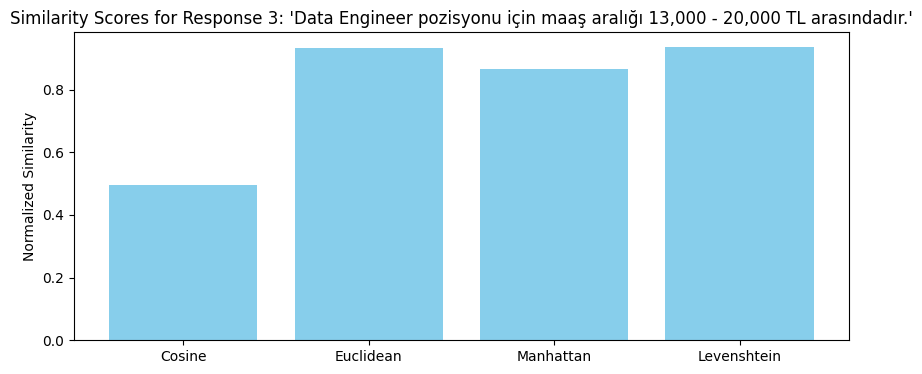

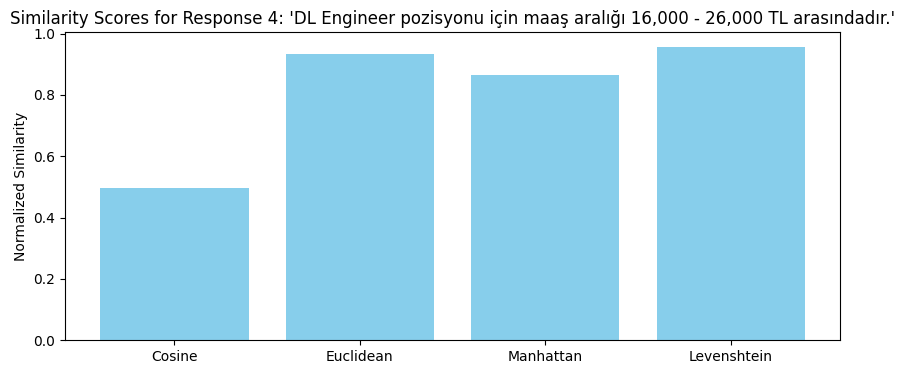

In [33]:
import matplotlib.pyplot as plt

metrics = ["Cosine", "Euclidean", "Manhattan", "Levenshtein"]
scores = [
    calculate_cosine_similarity(user_input, responses),
    calculate_euclidean_distance(user_input, responses),
    calculate_manhattan_distance(user_input, responses),
    calculate_levenshtein_distance(user_input, responses)
]

# Normalize scores for better comparison
scores_normalized = [np.array(score) / max(score) for score in scores]

for i, response in enumerate(responses):
    plt.figure(figsize=(10, 4))
    plt.bar(metrics, [scores_normalized[j][i] for j in range(len(metrics))], color='skyblue')
    plt.title(f"Similarity Scores for Response {i+1}: '{response}'")
    plt.ylabel("Normalized Similarity")
    plt.show()
